# Shockley Ramo Analysis of CZT Detector 2

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# general package imports
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit
from scipy.stats import linregress
# from spectrum import gaussian
import pandas as pd

# import tool repo
import sys

# UPDATE PATH TO PATH WHERE YOU HAVE REPO SAVED
sys.path.append('/Users/kalie/courses/ne204/lab/kalie-trevor-ian-lab3')
from shockley_ramo import charge_transport_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cathode analysis

In [66]:
ctm_cathode = charge_transport_model()

In [67]:
# loop at map of anode face
ctm_cathode.geom_map[0]

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 3, 5, 5, 5, 5, 5, 5, 5,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3])

<IPython.core.display.Javascript object>


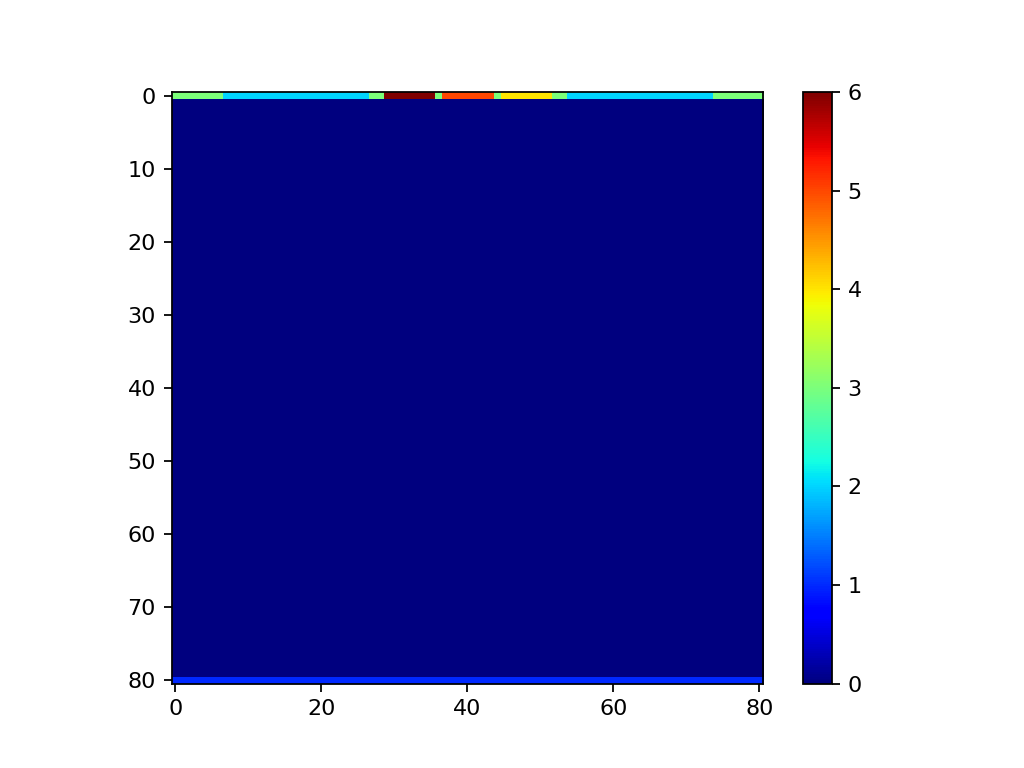

In [68]:
# view geometry map
plt.figure()
plt.imshow(ctm_cathode.geom_map,cmap='jet')
plt.colorbar()
plt.savefig('figs/geom_map.png')
plt.show()

In [69]:
# find WP of cathode
ctm_cathode.find_WP(1)

<IPython.core.display.Javascript object>


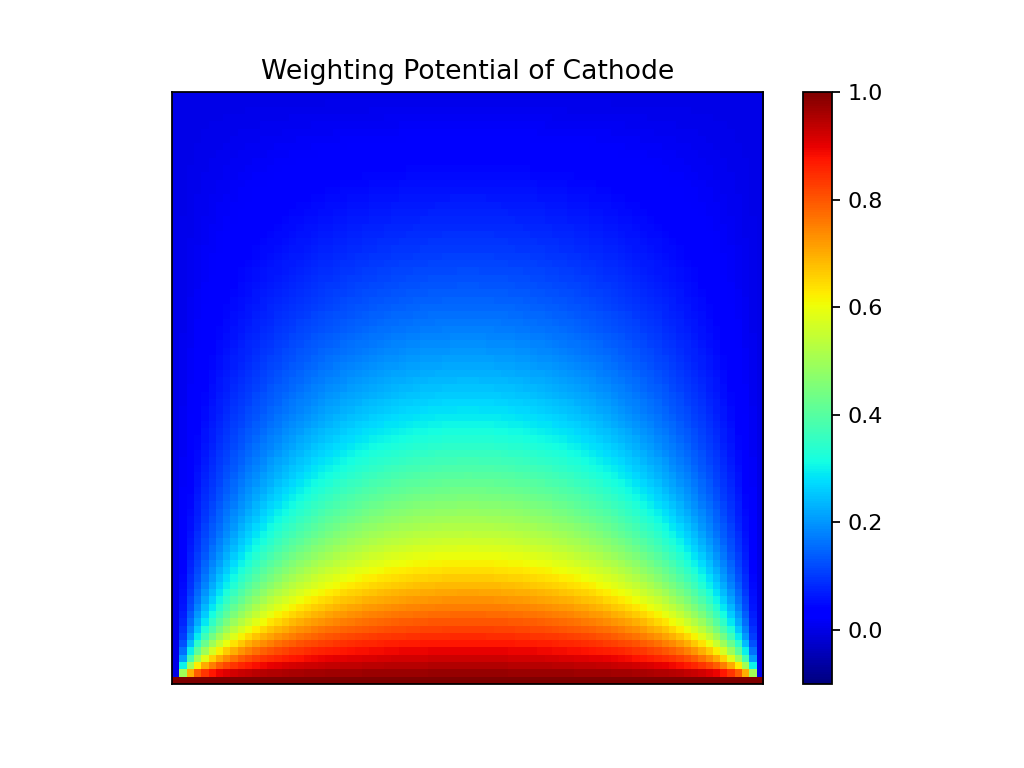

In [70]:
ctm_cathode.plot_WP()
plt.title('Weighting Potential of Cathode')
plt.savefig('figs/WP_Cathode.png')

<IPython.core.display.Javascript object>


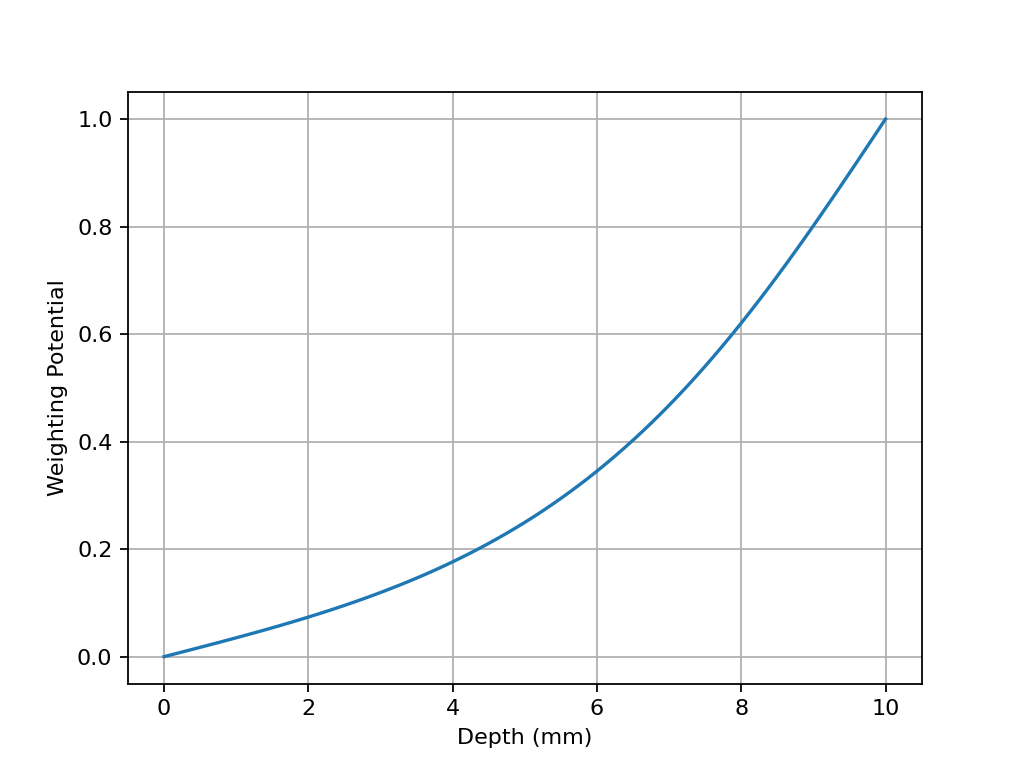

In [71]:
ctm_cathode.plot_WP_slice(41)
plt.savefig('cathode_WP_slice.png')

In [78]:
depths = np.linspace(0.1,9.9)
rise_times = np.zeros(len(depths))
for i in range(len(depths)):
    rise_times[i] = ctm_cathode.drift_particles_cathode(41,depths[i])

In [79]:
rise_times

array([3538., 5672., 5575., 5481., 5389., 5297., 5206., 5116., 5025.,
       4935., 4845., 4754., 4664., 4570., 4477., 4383., 4287., 4190.,
       4093., 3992., 3891., 3789., 3684., 3578., 3470., 3361., 3250.,
       3139., 3010., 2880., 2751., 2620., 2488., 2354., 2220., 2084.,
       1948., 1810., 1670., 1531., 1390., 1248., 1107.,  965.,  822.,
        680.,  551.,  437.,  371.,  443.])

<IPython.core.display.Javascript object>


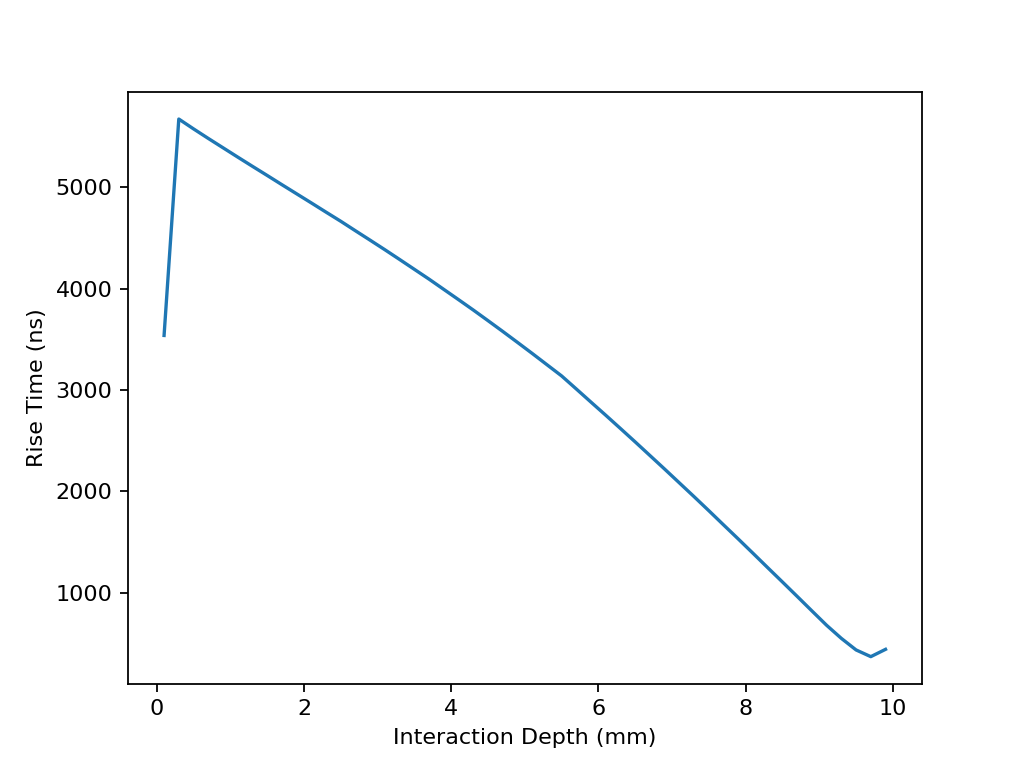

Text(0, 0.5, 'Rise Time (ns)')

In [80]:
plt.figure()
plt.plot(depths,rise_times)
plt.xlabel('Interaction Depth (mm)')
plt.ylabel('Rise Time (ns)')

<IPython.core.display.Javascript object>


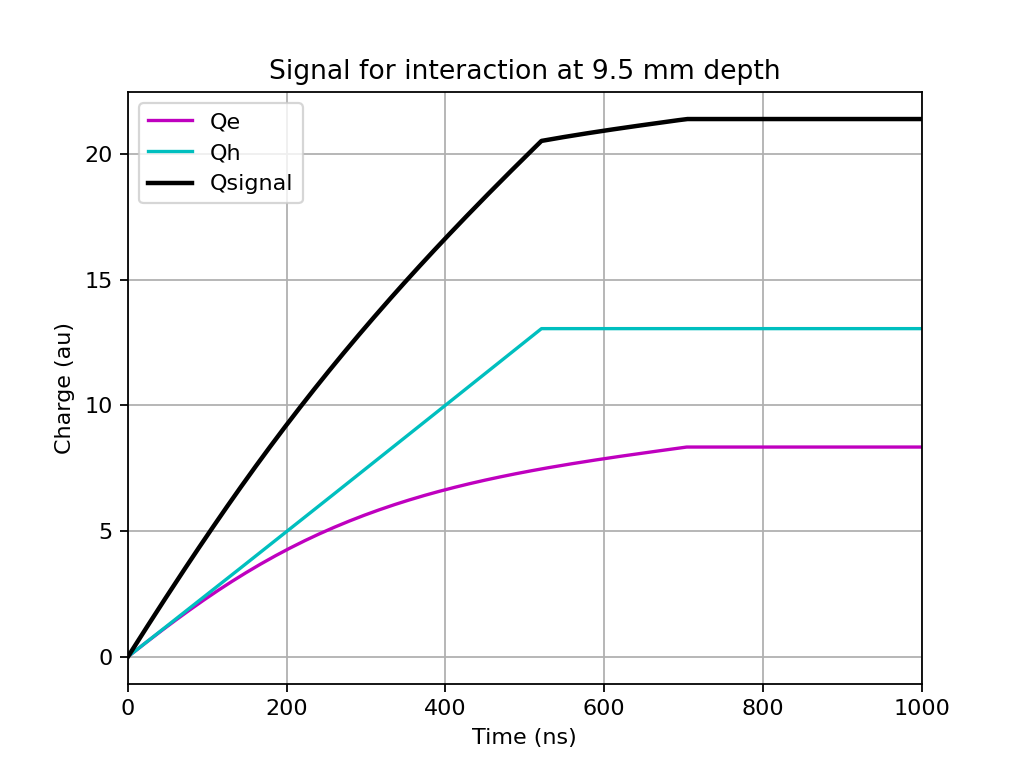

437


In [82]:
rise_time = ctm_cathode.drift_particles_cathode(41,9.5,show_plot=True)
plt.xlim(0,1000)
print(rise_time)

# Anode 5 analysis

In [83]:
ctm_anode = charge_transport_model()

In [84]:
# loop at map of anode face
ctm_anode.geom_map[0]

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 3, 5, 5, 5, 5, 5, 5, 5,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3])

In [85]:
# find WP of cathode
ctm_anode.find_WP(5)

<IPython.core.display.Javascript object>


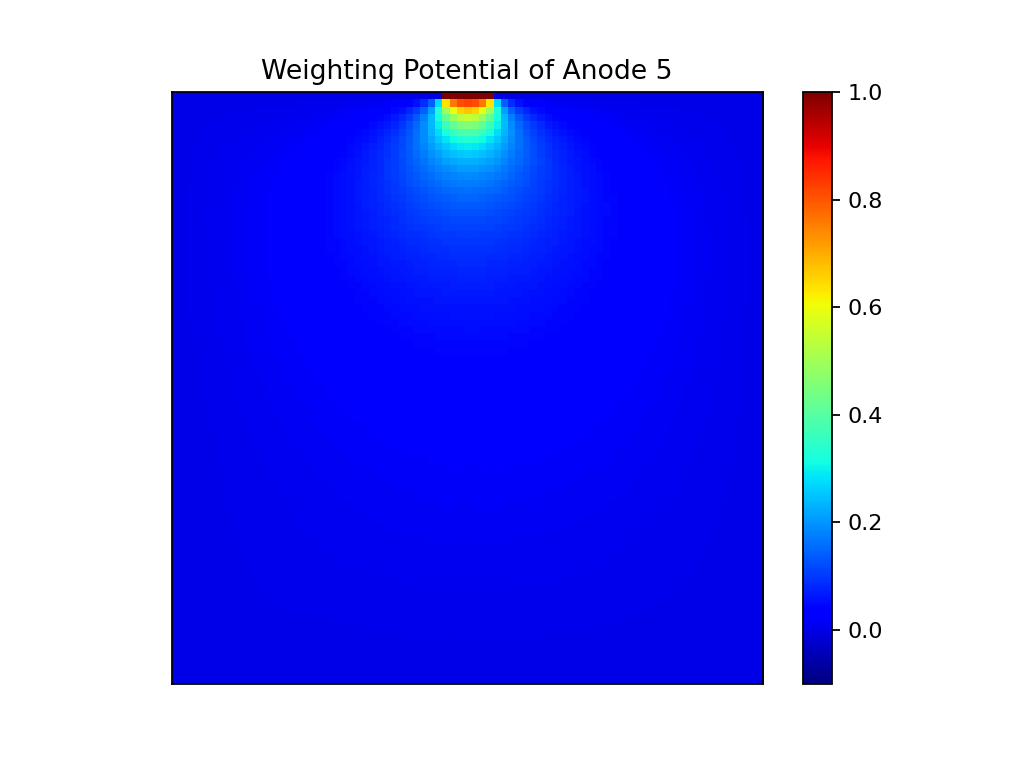

Text(0.5, 1.0, 'Weighting Potential of Anode 5')

In [86]:
ctm_anode.plot_WP()
plt.title('Weighting Potential of Anode 5')

<IPython.core.display.Javascript object>


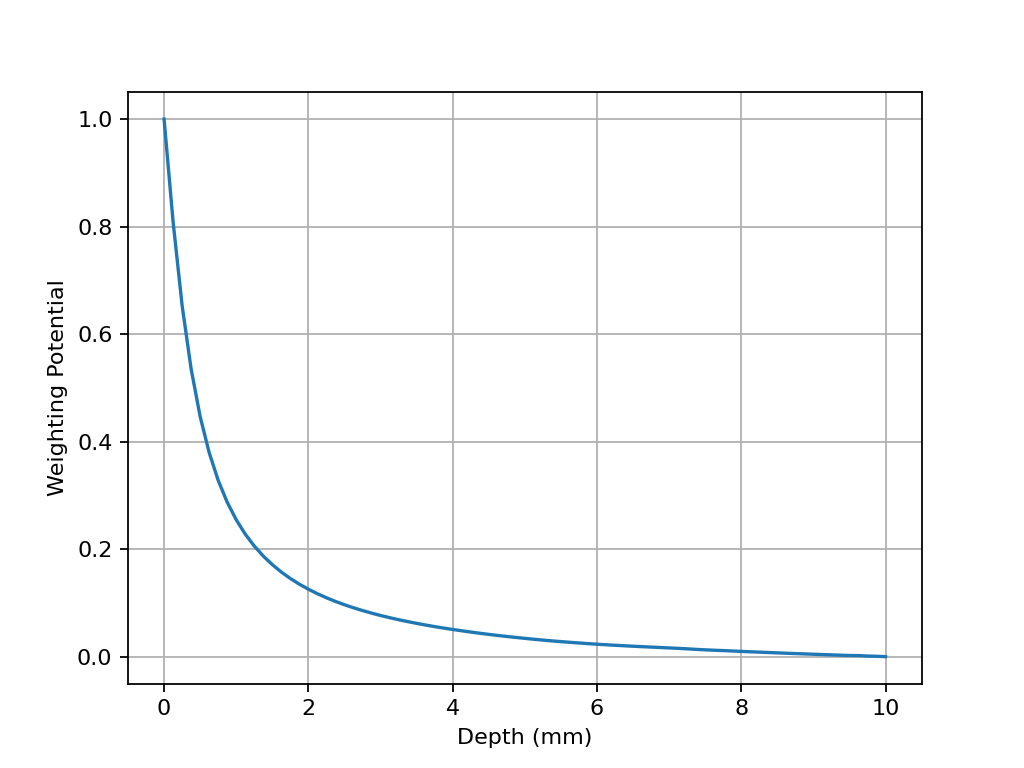

In [87]:
ctm_anode.plot_WP_slice(41)

<IPython.core.display.Javascript object>


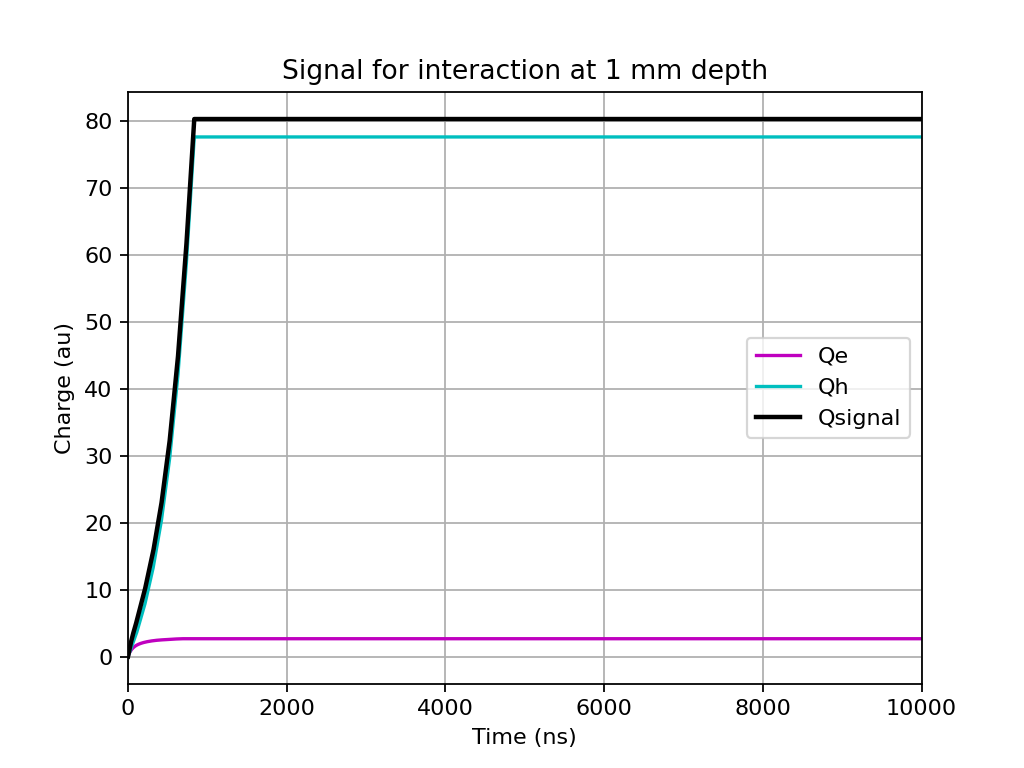

623

In [94]:
ctm_anode.drift_particles_anode(41,1,show_plot=True)

In [95]:
depths = np.linspace(0.1,9.9)
rise_times = np.zeros(len(depths))
for i in range(len(depths)):
    rise_times[i] = ctm_anode.drift_particles_anode(41,depths[i])

<IPython.core.display.Javascript object>


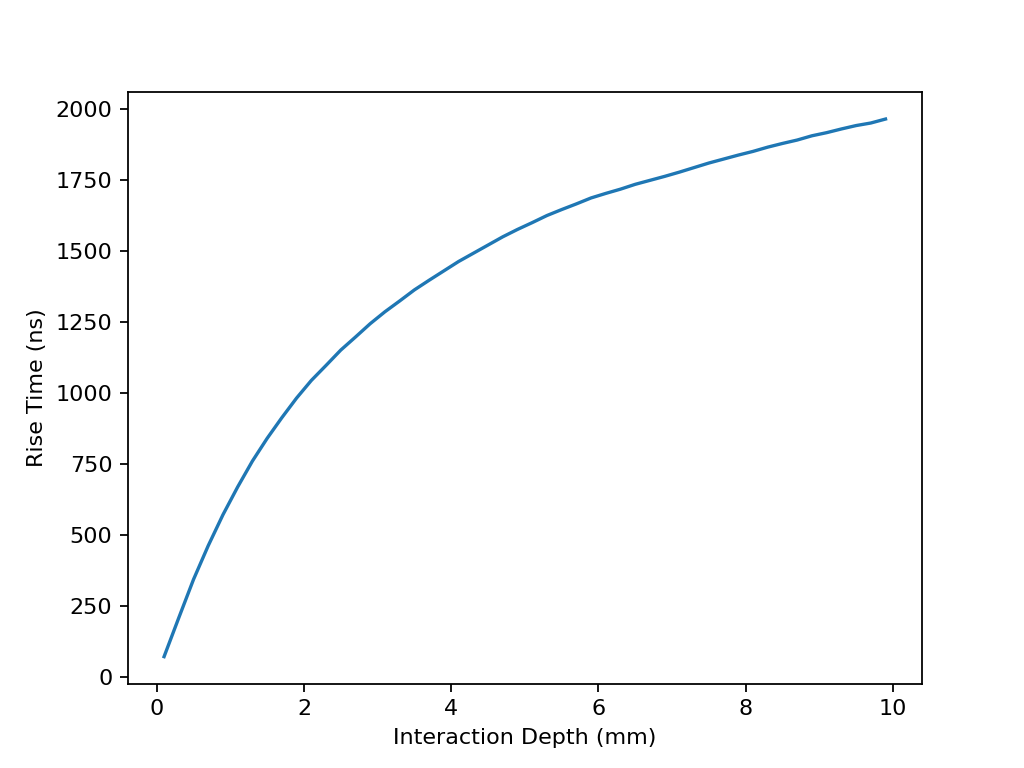

Text(0, 0.5, 'Rise Time (ns)')

In [96]:
plt.figure()
plt.plot(depths,rise_times)
plt.xlabel('Interaction Depth (mm)')
plt.ylabel('Rise Time (ns)')

<IPython.core.display.Javascript object>


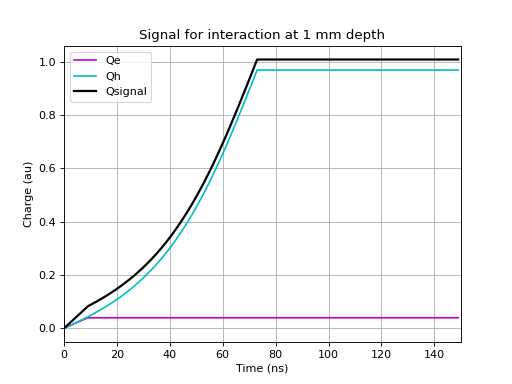

In [71]:
_, _, _ = ctm.drift_particles(41,1)

In [72]:
ctm.find_rise_time()

56

<IPython.core.display.Javascript object>


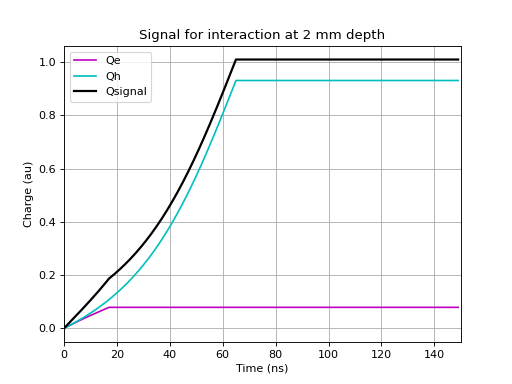

In [73]:
Qh_a_2,Qe_a_2, Q_a_2 = ctm.drift_particles(41,2)

<IPython.core.display.Javascript object>


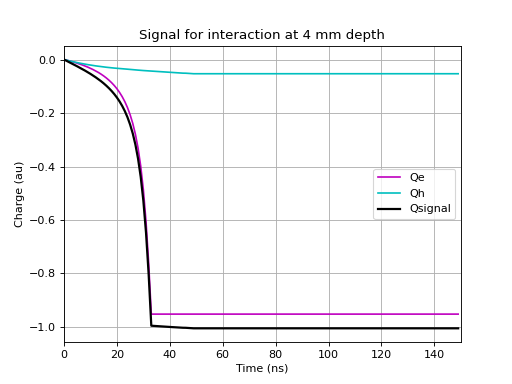

In [96]:
_, _, _ = ctm_anode.drift_particles(41,depths[4],show_plot=True)

In [97]:
ctm_anode.find_rise_time()

0

In [94]:
depths = np.arange(0,9)
rise_times = np.zeros(len(depths))
for i in range(len(depths)):
    _, _, _ = ctm_anode.drift_particles(41,depths[i])
    rise_times[i] = ctm_anode.find_rise_time()

<IPython.core.display.Javascript object>


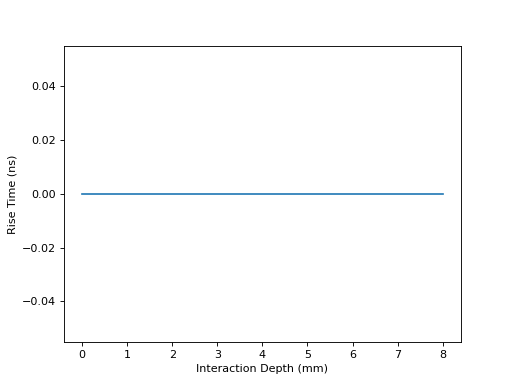

In [95]:
plt.figure()
plt.plot(depths,rise_times)
plt.xlabel('Interaction Depth (mm)')
plt.ylabel('Rise Time (ns)')
plt.show()

In [ ]:
ctm_

In [100]:
depths

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [61]:
t10 = np.argwhere(Q_a_2 >= Q_a_2.max()*.1).flatten()[0]
t90 = np.argwhere(Q_a_2 >= Q_a_2.max()*.9).flatten()[0]
t90-t10

51

<IPython.core.display.Javascript object>


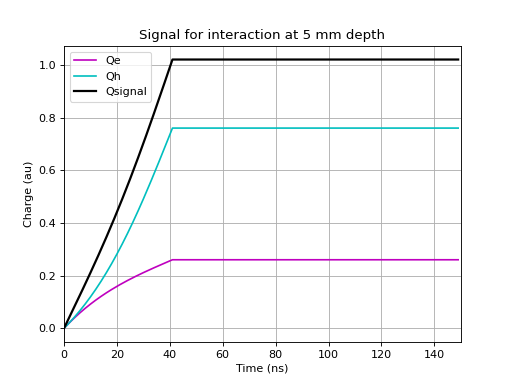

In [99]:
Qh_a_5,Qe_a_5, Q_a_5 = ctm.drift_particles(41,5,show_plot=True)

<IPython.core.display.Javascript object>


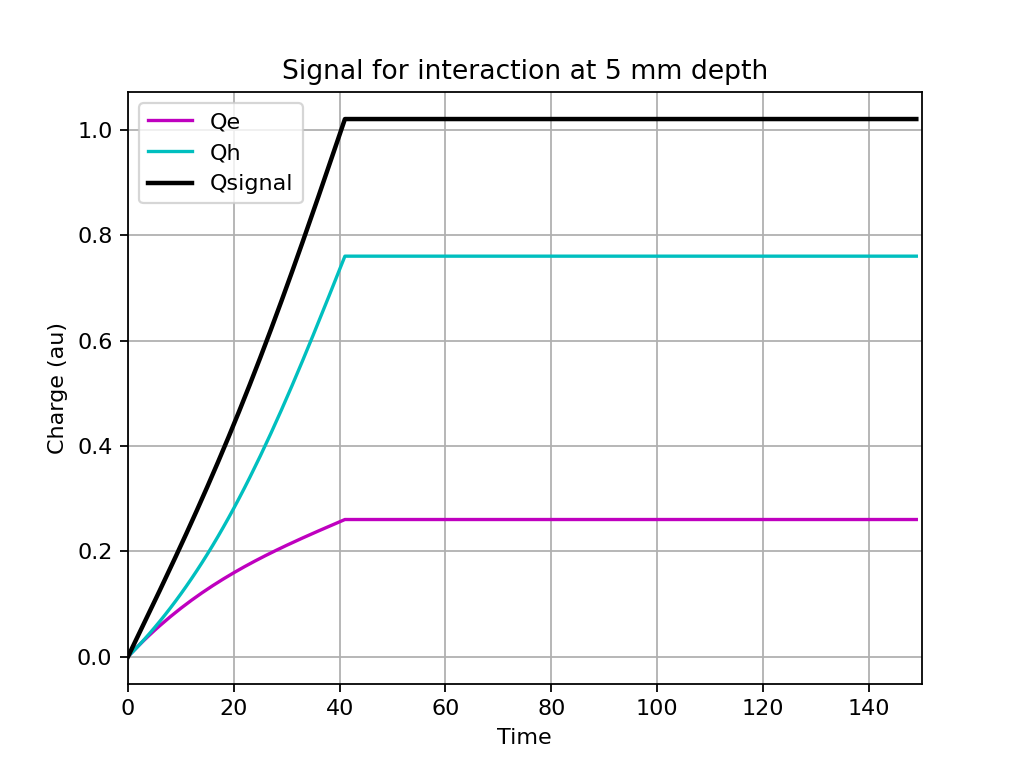

In [41]:
Qh_a_5,Qe_a_5, Q_a_5 = ctm.drift_particles(41,5)

<IPython.core.display.Javascript object>


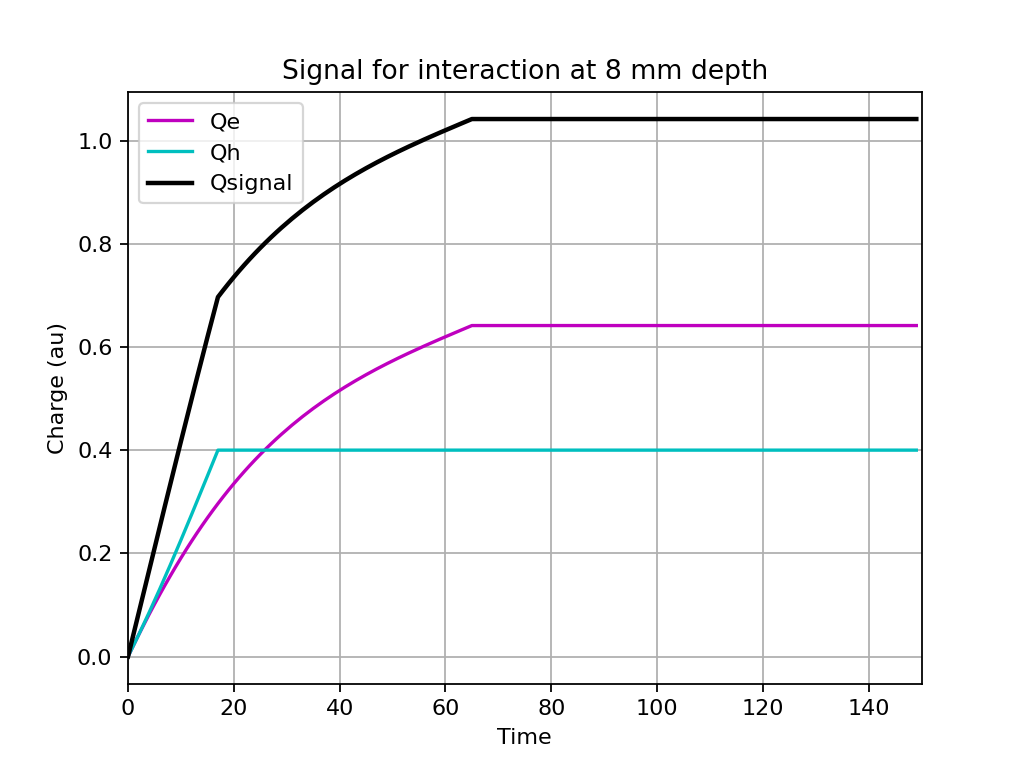

In [43]:
Qh_a_2,Qe_a_2, Q_a_2 = ctm.drift_particles(41,8)